This analysis is borrowed from RithvikMath
- https://www.youtube.com/watch?v=y8opUEd05Dg&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=21
- https://github.com/ritvikmath/Time-Series-Analysis/blob/master/Time%20Series%20Data.ipynb

In [1]:
import pandas as pd
import numpy as np
import pylab
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')

In [3]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [5]:
df_ice_cream.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [6]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream['date'])

In [7]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [8]:
df_ice_cream.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [9]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [10]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [11]:
pylab.figure(figsize=(10, 4))
pylab.plot(df_ice_cream['production'])
pylab.title('Ice Cream Production over Time', fontsize=20)
pylab.ylabel('Production', fontsize=16)
for year in range(2011, 2021):
    pylab.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)

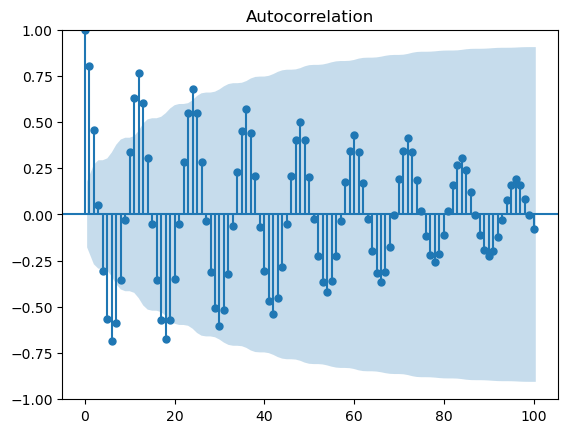

In [14]:
# make the autocorrelation plot
plot_acf(df_ice_cream['production'], lags=100)

This looks like an autoregresssive process

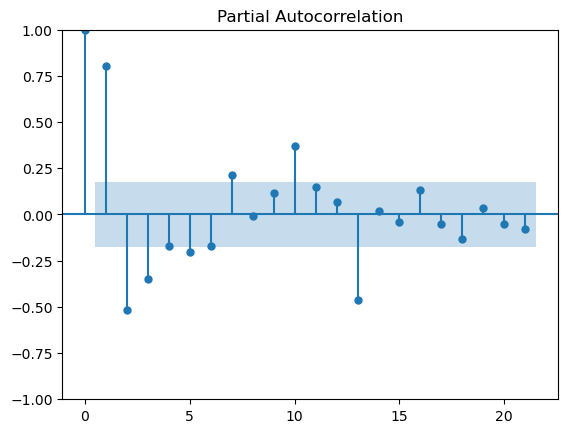

In [16]:
plot_pacf(df_ice_cream['production'], method='ywm')

looks like lag 3, 10, or 13 would work well for an autoregressive model (or 1 or 2, but it would be strange to not at least go to 3)